In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# your implementations
You may add new cells, write helper functions or test code as you see fit.
Please use this cell and include a description of your implementation.
Explain code design consideration, algorithmic choices and any other details you think is relevant to understanding your implementation 

# PART 1 - AdaBoost Implementation

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# set seed for random number generator
np.random.seed(42)

In [3]:
# Part 1: Implementing AdaBoost
class AdaBoostCustom:
    def __init__(self, T = 50, learning_rate=1.0):
        self.T = T # Number of weak learners
        self.alphas = []
        self.models = []
        # Note: You may add more attributes
        self.learning_rate = learning_rate

    def fit(self, X, y):
        # a) Initialization
        # i) Initialize a zero model
        self.model = np.zeros(X.shape[0])

        # ii)	Initialize the weights
        self.weights = np.ones(X.shape[0]) / X.shape[0] # Weights are uniform when initialized
        
        
        # b) Boosting loop:
        for t in range(self.T):
            # i) Train a weighted decision stump
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=self.weights)
            self.models.append(model)
            
            # ii) Calculate the weighted classification error
            predictions = model.predict(X)
            error = np.sum(self.weights * (predictions != y)) / np.sum(self.weights)

            # if error is zero, make it a very small number to avoid division by zero
            if error == 0:
                error = 1e-10
            
            # iii) Find the optimal step size
            alpha = self.learning_rate * 0.5 * np.log((1 - error) / error)
            self.alphas.append(alpha)
            
            # iv) Update the ensemble model 
            self.model += alpha * predictions
            
            # v) Update the weights only if it is not the last iteration
            if t < self.T - 1:
                # If y = predictions then reduce the weight for this sample
                # If y != predictions then increase the weight for this sample
                self.weights *= np.exp(-alpha * y * predictions)
                self.weights /= np.sum(self.weights)
    
    def predict(self, X):  
        #Y = np.random.randint(0,2,X.shape[0])
        # Your code here
        Y = np.zeros(X.shape[0])

        # For each model, predict the output and multiply it by the alpha value
        for alpha, model in zip(self.alphas, self.models):
            Y += alpha * model.predict(X)
        return np.sign(Y)
        
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

# generate test data

Accuracy of custom AdaBoost:  0.88


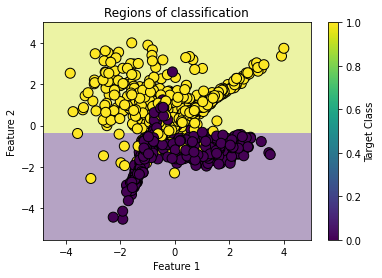

In [4]:
# Generate test dataset - change this to fit your needs
N = 1000

X, y = make_classification(n_samples=N, n_features=2, n_informative=2,n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test the model
T = 100
model = AdaBoostCustom(T)
model.fit(X_train, y_train)
print("Accuracy of custom AdaBoost: ", model.score(X_test, y_test))

# Plot the dataset with the regions of classification
plt.figure()
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100)
plt.title("Regions of classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Target Class')
plt.show()

The implemented Adaboost on the generated dataset had an accuracy of 82.5%. This can be visually appreciated on the graph that shows all data points and their label (according to the color) as well as the classification region. Indeed, most purple class points are located in the purple are just like most yellow points are located on the yellow area. The implemented model is therefore working well on the generated dataset.

# Test AdaBoost implementation 
Demonstrate your AdaBoost implementation.
Add plots and figures if needed.
Please use this cell to describe your results and tests

Custom AdaBoost Accuracy: 0.88
Sklearn AdaBoost Accuracy: 0.88


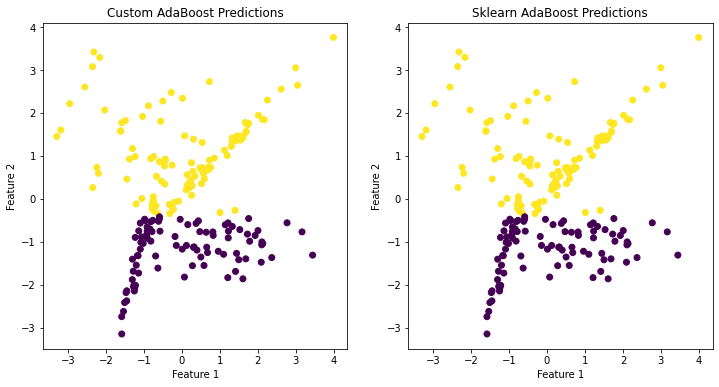

In [5]:
# Instantiate and train the AdaBoost model
custom_model = AdaBoostCustom(T=10)
custom_model.fit(X_train, y_train)

# Predictions and evaluation for custom AdaBoost
y_pred_custom = custom_model.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

# Instantiate and train the sklearn AdaBoost model
sklearn_model = AdaBoostClassifier(n_estimators=10, random_state=42)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

# Print accuracies
print(f"Custom AdaBoost Accuracy: {custom_accuracy}")
print(f"Sklearn AdaBoost Accuracy: {sklearn_accuracy}")

# Plotting comparisons
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom)
plt.title('Custom AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.title('Sklearn AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

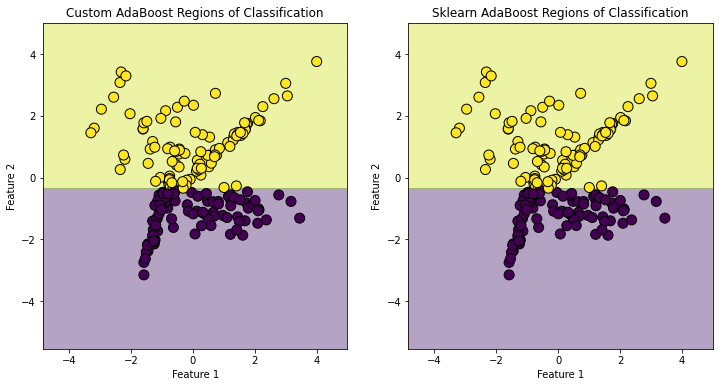

In [6]:
# Plot comparisons with regions of classification
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom, edgecolors='k', s=100)
plt.title('Custom AdaBoost Regions of Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn, edgecolors='k', s=100)
plt.title('Sklearn AdaBoost Regions of Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Custom AdaBoost Precision: 0.8504672897196262
Custom AdaBoost Recall: 0.9191919191919192
Custom AdaBoost F1 Score: 0.883495145631068
Sklearn AdaBoost Precision: 0.8504672897196262
Sklearn AdaBoost Recall: 0.9191919191919192
Sklearn AdaBoost F1 Score: 0.883495145631068


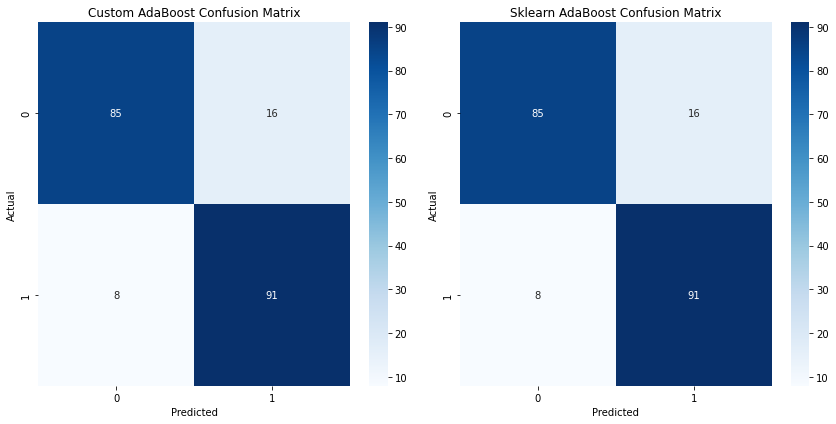

In [7]:
# Calculate precision, recall, and F1 score for custom AdaBoost
precision_custom = precision_score(y_test, y_pred_custom)
recall_custom = recall_score(y_test, y_pred_custom)
f1_custom = f1_score(y_test, y_pred_custom)

print(f"Custom AdaBoost Precision: {precision_custom}")
print(f"Custom AdaBoost Recall: {recall_custom}")
print(f"Custom AdaBoost F1 Score: {f1_custom}")

# Calculate precision, recall, and F1 score for sklearn AdaBoost
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print(f"Sklearn AdaBoost Precision: {precision_sklearn}")
print(f"Sklearn AdaBoost Recall: {recall_sklearn}")
print(f"Sklearn AdaBoost F1 Score: {f1_sklearn}")

# Plot confusion matrices side by side
plt.figure(figsize=(12, 6))  # Set figure size to be large enough for both subplots

# Custom AdaBoost confusion matrix
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
cm_custom = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Custom AdaBoost Confusion Matrix')

# Sklearn AdaBoost confusion matrix
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Sklearn AdaBoost Confusion Matrix')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

# PART 2 - Experiments
Describe the experiments you decided to perform and explain the logic behind your decision.
Generate the test data, perform the experiments and report the results.
Use plots, tables and other visualizations as you see fit.
You can use as many code and markdown cells you need for the presentation to be clear.

For the experiments we generate two datasets with the help of sklearn.datasets library. The first experiments will be to classify with Adaboost a dataset with points that that belong to different blobs. The second experiment will be with the dataset make_circles, so that we can evaluate the performance of Adaboost when differentiating between different concentric circles. 

In [8]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

A + B) Here we generate the datasets and split them to train and test

In [9]:
# Experiment 1: Blobs
blobs_data = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)
X_blobs, y_blobs = blobs_data
X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs = train_test_split(X_blobs, y_blobs, test_size=0.2, random_state=42)


# Experiment 2: Circles
data_circle, labels_circle = make_circles(n_samples=1000, noise=0.1, factor=0.1, random_state=42)
labels_circle = np.where(labels_circle == 0, -1, 1)  # Adjust labels for AdaBoost

# Split the Circles dataset into training and testing sets
X_train_circle, X_test_circle, y_train_circle, y_test_circle = train_test_split(data_circle, labels_circle, test_size=0.2, random_state=42)

C) Visualization

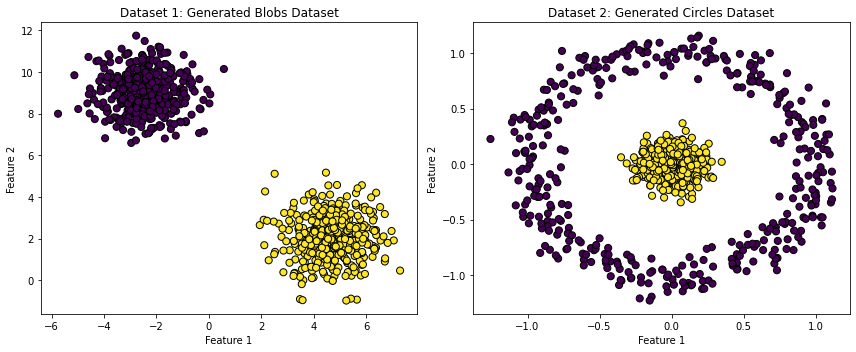

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

scatter1 = axes[0].scatter(X_train_blobs[:, 0],
                           X_train_blobs[:, 1],
                           c=y_train_blobs,
                           edgecolors='k',
                           cmap='viridis', s=50)
axes[0].set_title('Dataset 1: Generated Blobs Dataset')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

scatter2 = axes[1].scatter(X_train_circle[:, 0],
                           X_train_circle[:, 1],
                           c=y_train_circle, 
                           edgecolors='k',
                           cmap='viridis', s=50)
axes[1].set_title('Dataset 2: Generated Circles Dataset')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()

plt.show()

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1) 
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    return accuracy, precision, recall, f1


def plot_decision_boundary(model, X, y, ax, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size in the mesh
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    ax.set_title(title)

In [12]:
results = []
models_for_plotting = {}

for dataset_name, (X_train, X_test, y_train, y_test) in [("Blobs", (X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs)),
                                                             ("Circles", (X_train_circle, X_test_circle, y_train_circle, y_test_circle))]:
        ada_custom = AdaBoostCustom(T = T) 
        ada_sklearn = AdaBoostClassifier(n_estimators=10, random_state=42)
        
        models = {
            'Custom AdaBoost': ada_custom,
            'Scikit-learn AdaBoost': ada_sklearn}
        
        for model_name, model in models.items():
            model.fit(X_train, y_train)
            accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
            results.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1})
            
            key = (dataset_name, model_name, 10)
            models_for_plotting[key] = model

results_df = pd.DataFrame(results)

In [13]:
results_df

,Dataset,Model,Accuracy,Precision,Recall,F1 Score
0,Blobs,Custom AdaBoost,1.000,1.0,1.00,1.000000
1,Blobs,Scikit-learn AdaBoost,1.000,1.0,1.00,1.000000
2,Circles,Custom AdaBoost,0.995,1.0,0.99,0.994975
3,Circles,Scikit-learn AdaBoost,0.995,1.0,0.99,0.994975


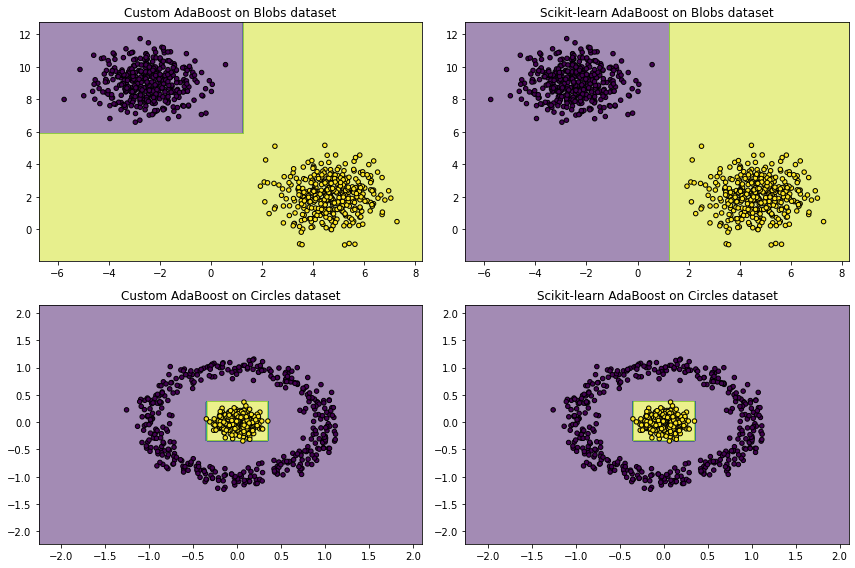

In [14]:
fig, axes = plt.subplots(2, len(models_for_plotting) // 2, figsize=(12, 8))  
axes = axes.flatten()

for i, ((dataset_name, model_name, n_estimators), model) in enumerate(models_for_plotting.items()):
    X_train, y_train = (X_train_blobs, y_train_blobs) if dataset_name == "Blobs" else (X_train_circle, y_train_circle)
    plot_decision_boundary(model, X_train, y_train, axes[i], f'{model_name} on {dataset_name} dataset')  

plt.tight_layout() 
plt.show()

In [15]:
n_estimators = 10
results = []
models_for_plotting = {}

for dataset_name, (X_train, X_test, y_train, y_test) in [("Blobs", (X_train_blobs, X_test_blobs, y_train_blobs, y_test_blobs)),
                                                             ("Circles", (X_train_circle, X_test_circle, y_train_circle, y_test_circle))]:
        decision_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
        logistic_reg = LogisticRegression(random_state=42)
        svm_classifier = SVC(random_state=42)
        knn_classifier = KNeighborsClassifier()

        models = {
            'Decision Tree': decision_tree,
            'Logistic Regression': logistic_reg,
            'SVM': svm_classifier,
            'KNN': knn_classifier}

        for model_name, model in models.items():
            model.fit(X_train, y_train)
            accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
            results.append({
                'Dataset': dataset_name,
                'Model': model_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1 Score': f1})
            
            key = (dataset_name, model_name, n_estimators)
            models_for_plotting[key] = model

results_df = pd.DataFrame(results)

For question number 5.b: "Compare the results to other models" we added Decition tree, Logistic regression, Randon forest, SVM and KNN.

C) The results:

In [16]:
results_df

,Dataset,Model,Accuracy,Precision,Recall,F1 Score
0,Blobs,Decision Tree,1.000,1.000000,1.00,1.000000
1,Blobs,Logistic Regression,1.000,1.000000,1.00,1.000000
2,Blobs,SVM,1.000,1.000000,1.00,1.000000
3,Blobs,KNN,1.000,1.000000,1.00,1.000000
4,Circles,Decision Tree,0.665,0.600000,0.99,0.747170
5,Circles,Logistic Regression,0.515,0.512821,0.60,0.552995
6,Circles,SVM,1.000,1.000000,1.00,1.000000
7,Circles,KNN,1.000,1.000000,1.00,1.000000


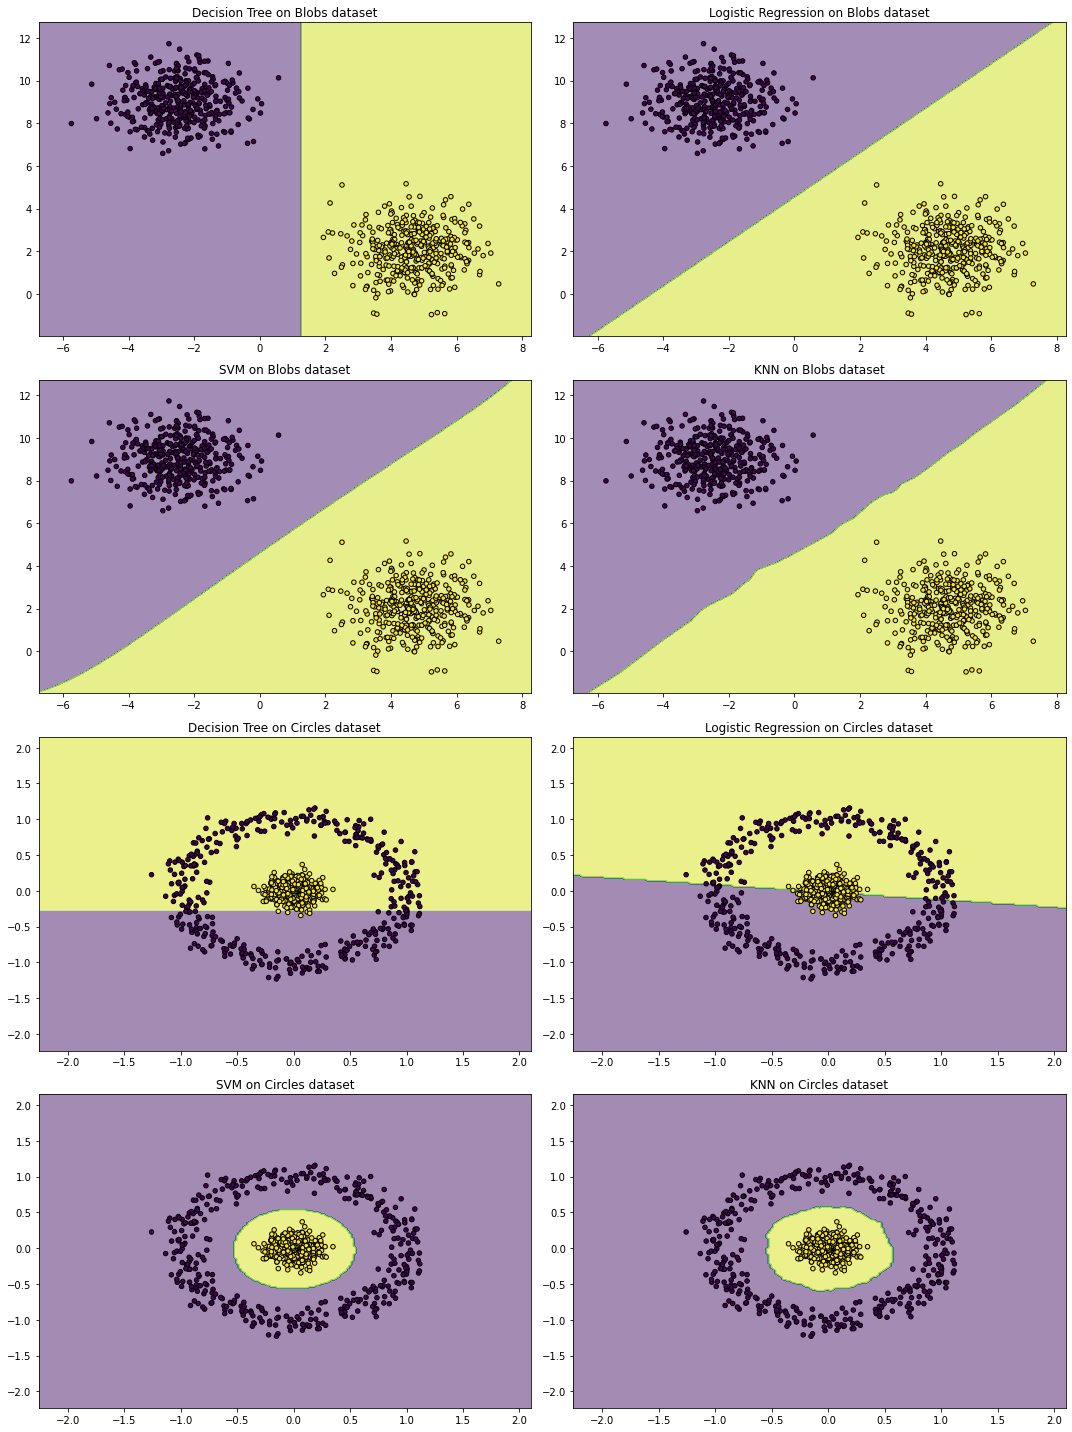

In [17]:
plot_pairs = list(models_for_plotting.items())
num_plots = len(plot_pairs)
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, num_plots * 2.5))
axes = axes.flatten()

for i, ((dataset_name, model_name, n_estimators), model) in enumerate(plot_pairs):
    X_train, y_train = (X_train_blobs, y_train_blobs) if dataset_name == "Blobs" else (X_train_circle, y_train_circle)
    plot_decision_boundary(model, X_train, y_train, axes[i], f'{model_name} on {dataset_name} dataset')

plt.tight_layout()
plt.show()

D) As excpected, the Blobs dataset was rather easy and all the classification models preform well on it. yet when it came to complex dataset (circels), the logistic regression and decision tree got bad result.

Logistic regression tries to separate classes using a straight line so when the boundary between the classes is circular, logistic regression cannot effectively capture this non-linear relationship.

Decision trees are problematic with curved data because it leads to too many split resulting in poor classification.

On the other hand, SVM and KNN got really good result on the circles dataset because it has a non-linear decision boundary separating the two classes and both SVM and KNN algorythms are capable of learning non-linear decision boundaries. SVM and KNN can effectively capture complex boundaries.